In [16]:
import yaml
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
def load_df(path):
    # Load data to a dataframe
    with open(path) as f:
        d = yaml.load(f)

    df = pd.DataFrame(columns=['run', 'ndim', 'method', 'f(x)', 'nfev', 'ng', 'time'])

    for k1 in d.keys():
        for k2 in d[k1].keys():
            for k3 in d[k1][k2].keys():
                s = pd.Series({
                    'run': int(k1.split('=')[-1]),
                    'ndim': int(k2.split('=')[-1]),
                    'method': k3.split('=')[-1],
                    'f(x)': float(d[k1][k2][k3]['f(x)']),
                    'nfev': float(d[k1][k2][k3]['nfev']),
                    'ng': float(d[k1][k2][k3]['ng']),
                    'time': float(d[k1][k2][k3]['time']),
                })
                df = df.append(s, ignore_index=True)

    return df

df = load_df('results/parallel_results_1.yaml')

In [18]:
# Calculate average results
mean = df.groupby(['method', 'ndim']).mean()
std = df.groupby(['method', 'ndim']).std()

print(mean)
print(std)

f(x)     nfev      ng       time
method   ndim                                       
ga       128   75.948075  99100.0  1000.0  37.408334
simple   128   61.461129  99100.0  1000.0  75.472415
standard 128   70.096293  99100.0  1000.0  53.086632
                   f(x)  nfev   ng      time
method   ndim                               
ga       128   6.911737   0.0  0.0  0.960679
simple   128   4.935262   0.0  0.0  3.357761
standard 128   5.667213   0.0  0.0  2.663594


Text(0, 0.5, 'f(x)')

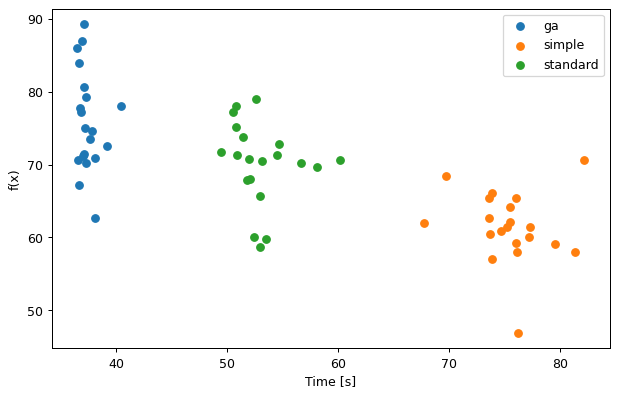

In [19]:
fig, ax = plt.subplots(1, 1, figsize=(8, 5), dpi=90)

lab = 'ga'
ax.scatter(
    df.loc[df['method'] == lab, 'time'],
    df.loc[df['method'] == lab, 'f(x)'],
    label=lab
)

lab = 'simple'
ax.scatter(
    df.loc[df['method'] == lab, 'time'],
    df.loc[df['method'] == lab, 'f(x)'],
    label=lab
)

lab = 'standard'
ax.scatter(
    df.loc[df['method'] == lab, 'time'],
    df.loc[df['method'] == lab, 'f(x)'],
    label=lab
)

ax.legend()
ax.set_xlabel('Time [s]')
ax.set_ylabel('f(x)')